In [217]:
import csv
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
from nltk.tokenize import word_tokenize
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import re 
import glob
from gensim import corpora
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

C:\anaconda\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### 1.Sentiment analysis
   - based on absolute proportional difference
   - based on naive
   
### 2.Compare label difference and manual relabel confused reviews

### 3.Run sentiment analysis on CNN based on manual labeled reviews and compare with Amazon


In [6]:
file_path = '/Users/Xing Fang/Desktop/2019f/bia 660/final project/sentiment/New/*.csv'

addrs = glob.glob(file_path)
# load data from New 
for idx, addr in enumerate(addrs):
   
    if idx == 0:
        review_df = pd.read_csv(addr)
    else:
        new_df = pd.read_csv(addr)
        review_df = pd.concat([review_df, new_df], ignore_index=True)

# load data from previous clusters
dir_list = ['/Users/Xing Fang/Desktop/2019f/bia 660/final project/sentiment/Reviews/Cluster0','/Users/Xing Fang/Desktop/2019f/bia 660/final project/sentiment/Reviews/Cluster1','/Users/Xing Fang/Desktop/2019f/bia 660/final project/sentiment/Reviews/Cluster2']
for folder in dir_list:
    addrs = glob.glob(folder+'/*.csv')
    for addr in addrs:
        new_df = pd.read_csv(addr,encoding = 'unicode_escape')
        review_df = pd.concat([review_df, new_df], ignore_index=True)
del review_df['Unnamed: 0']

In [7]:
cluster_df = pd.read_excel('/Users/Xing Fang/Desktop/2019f/bia 660/final project/sentiment/Cluster_Result.xlsx')

In [121]:
df = pd.merge(review_df, cluster_df, left_on='book_title', right_on='title')

In [124]:
data = pd.DataFrame(list(zip(df['review'], df['sentiment'])), columns = ['review','sentiment'])

In [125]:
data = data.dropna(axis=0,how='any')

In [127]:
def tokenize(text):
    
    tokens = []
    text = str(text).lower()

    pattern= r'[a-z]+[.''\'-_]*[a-z]+'
    tokensall = nltk.regexp_tokenize(text, pattern)

    stop_words = stopwords.words('english')
    
    for token in tokensall:  
        if token not in stop_words:
            tokens.append(token)  

    return tokens

### 1.Sentiment analysis 
- based on Absolute Proportional Difference

  * Sentiment = (P − N) / (P + N + O)


In [102]:
with open("positive-words.txt",'r') as f:
        positive_word=[line.strip() for line in f]
        
with open("negative-words.txt",'r') as f:
    negative_word=[line.strip() for line in f]

In [163]:
def sentiment_analysis(text, positive_words, negative_words):
    
    negations=["not", "no", "isn't", "wasn't", "aren't", \
                   "weren't", "don't", "didn't", "cannot", \
                   "couldn't", "won't", "neither", "nor"]

    tokens=tokenize(text)
    positive_tokens=[]
    negative_tokens=[]

    positive_words=[token for token in tokens if token in positive_word]
    negative_words=[token for token in tokens if token in negative_word]

    for idx, token in enumerate(positive_words):
        if token in positive_words:
            if idx!=0:
                if tokens[idx-1] not in negative_words:
                    positive_tokens.append(token)
                if tokens[idx-1]  in negative_words:
                    negative_tokens.append(token)
            else:
                positive_tokens.append(token)

    for idx, token in enumerate(negative_words):
        if token in negative_words:
            if idx!=0:
                if tokens[idx-1] not in negative_words:
                    negative_tokens.append(token)
                if tokens[idx-1]  in negative_words:
                    positive_tokens.append(token)
            else:
                negative_tokens.append(token)

    if (len(positive_tokens) - len(negative_tokens))/ len(text) > 0.004:
        sentiment = 1
        
    else:
        sentiment = 0
        
    return sentiment


In [133]:
data = list(zip(data['review'],data['sentiment']))

#### Try different thresholds to find best one with highest accuracy

In [161]:
#0.0001
score = 0

for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        
        if pre_sentiment == sentiment:
            score += 1
            
accuracy=score/len(corr_data)
print(accuracy)


0.685319903003171


In [154]:
#0.001
score = 0
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)

0.6857862339115837


In [156]:
#0.003
score = 0
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)

0.6860660324566312


In [164]:
#0.004
score = 0
label = []
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        label.append(pre_sentiment)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)

0.6937138593545981


In [146]:
#0.005
score = 0
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)

0.6878380899085992


In [152]:
#0.006
score = 0
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)

0.6847603059130759


In [150]:
#0.009
score = 0
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)

0.6678791270285395


In [148]:
#0.01
score = 0
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)

0.6560343219548592


#### Result: 0.004 is the best threshold with accuracy as 69.37%.

### 1.Sentiment analysis
 - based on naive

In [165]:
def sentiment_analysis(text, positive_words, negative_words):
    
    negations=["not", "no", "isn't", "wasn't", "aren't", \
                   "weren't", "don't", "didn't", "cannot", \
                   "couldn't", "won't", "neither", "nor"]

    tokens=tokenize(text)
    positive_tokens=[]
    negative_tokens=[]

    positive_words=[token for token in tokens if token in positive_word]
    negative_words=[token for token in tokens if token in negative_word]

    for idx, token in enumerate(positive_words):
        if token in positive_words:
            if idx!=0:
                if tokens[idx-1] not in negative_words:
                    positive_tokens.append(token)
                if tokens[idx-1]  in negative_words:
                    negative_tokens.append(token)
            else:
                positive_tokens.append(token)

    for idx, token in enumerate(negative_words):
        if token in negative_words:
            if idx!=0:
                if tokens[idx-1] not in negative_words:
                    negative_tokens.append(token)
                if tokens[idx-1]  in negative_words:
                    positive_tokens.append(token)
            else:
                negative_tokens.append(token)

    if len(positive_tokens)>len(negative_tokens):
        sentiment = 1
        
    if len(positive_tokens)<=len(negative_tokens):
        sentiment = 0
        
    return sentiment

In [166]:
score = 0
label = []
for review,sentiment in data:
        pre_sentiment=sentiment_analysis(review, positive_words, negative_words)
        label.append(pre_sentiment)
        if pre_sentiment == sentiment:
            score += 1
accuracy=score/len(corr_data)
print(accuracy)
print(label[0:50])

0.685319903003171
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]


### 2.Compare label difference and manually relabel confused reviews
- In this step, I compared results based on naive method with Amazon's results. And check the different labels, and manually relabel the confused reviews, remove reviews that are difficult to differentiate.

In [169]:
data = pd.DataFrame(list(zip(df['review'], df['sentiment'])), columns = ['review','sentiment'])
data = data.dropna(axis=0,how='any')

In [171]:
#add new colomn 'label'
data['label'] = label

In [191]:
#compare 'label' and 'sentiment' columns, to fing the different rows and test if 'sentiment' make sense
data['compare'] = np.where((data['label'] == data['sentiment']), '1', '0')

In [209]:
data.to_csv('compare.csv')

#### By checkingh the csv, I found Amazon's sentiment tags is not so accurate, like below reviews. Some people think it's a good book, but some part of it are not so good; or receipe is good, but not fit for them. All in all, the book may not fullfill their expectations, but it is still one good book. 
#### Based on our report insights, we want to  use sentiment analysis to evaluate one book. So although those reviews are tagged as negative, they finally agree that it is a good book. Then that kind reviews should be laballed as positive which can finally improve the results of book evaluations.

In [ ]:
#Yet another recipe book. We have thousands of them, and this is just another one. Is it useful? Yes, of course it is, but it's nothing special in the scheme of things.
#It's a pretty good book, they are some ingredients in it that are hard to find but other than that pretty awesome.
#Would have been nice if there were photos.
#Some good recipes but uses Splenda too much.
#I like the smoothie recipes, but my husband and I didn't stick on the cleanse past 3 days. I can't drink my meals every day. He also found them to not be as tasty (not very sweet, but he's a sweet tooth) which didn't help our motivation much. I think she gives some good principles, but this cleanse was not for us. Also, I would have liked to see more scientific-based information or at least references for some of the health information she provides.
#As a seasoned cook, I thought this would be a good resource to have to help our family avoid processed food. However, I found the recipes extremely basic for me. I felt I got better recipes from the authors website.
#I bought this because it was super discounted. I vaguely follow the blog. Author has a sensible moderate approach to food with no crazy out there ingredients. Good basic recipes inside, easy to make, but nothing I haven't seen elsewhere or tweaked my self. I don't have kids but the school lunch ideas were probably the most useful as I often get bored with the food I pack for work. Was worth it for the price I paid.
#there are parts I love about this book such as part one. Which talks about how to make changes and shopping for whole real food items but as far as the recipe portion I was not at all impressed. I love love love to cook and bake for my family but I could honestly have found these on Pinterest or created these myself. All in all, I gave three stars for the whole front half of the book because there was some great info there.
#Enjoy and gave as gift however nothing new.
#Good ideas and intention, but the recipes are a little too basic.
#Not as I expected, but still good.

#### Below reviews are those obviously positive, but tagged as negative by Amazon.

In [ ]:
#Pretty good
#Useful jar recipes of seasonal gifts for friends and family... The soups are worth the price of admission alone!
#This book has some good tips for how to pack and package home made mixes in jars. If you're looking for creative ways to give cookies for the holidays, check out this book.
#It was ok. Wasnt to impressed.
#Informative and useful to understand the program. Geared mostly to suit the Western diet

#### I manually relabel those confused or wrong labelled reviews and set it as colomn 'label'.

In [211]:
data = pd.read_csv('compare.csv',encoding = 'unicode_escape')

### 3.Run sentiment analysis on CNN 
 - set manually labelled reviews and same sentiment result reviews given by Amazon and naive as groundtruth 

In [218]:
MAX_NB_WORDS=10000
MAX_DOC_LEN=500
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data["review"])
sequences = tokenizer.texts_to_sequences(data["review"])
padded_sequences = pad_sequences(sequences, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', \
                                 truncating='post')

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, senti_train, senti_test = train_test_split(\
                        padded_sequences, data['label'],data['sentiment'],\
                        test_size=0.3, random_state=1)

In [220]:
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model

EMBEDDING_DIM=100

main_input = Input(shape=(MAX_DOC_LEN,), \
                   dtype='int32', name='main_input')

embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                    output_dim=EMBEDDING_DIM, \
                    input_length=MAX_DOC_LEN,\
                    name='embedding')(main_input)

conv1d_1= Conv1D(filters=64, kernel_size=1, \
                 name='conv_unigram',\
                 activation='relu')(embed_1)

pool_1 = MaxPooling1D(MAX_DOC_LEN-1+1, \
                      name='pool_unigram')(conv1d_1)

flat_1 = Flatten(name='flat_unigram')(pool_1)

conv1d_2= Conv1D(filters=64, kernel_size=2, \
                 name='conv_bigram',\
                 activation='relu')(embed_1)
pool_2 = MaxPooling1D(MAX_DOC_LEN-2+1, name='pool_bigram')(conv1d_2)
flat_2 = Flatten(name='flat_bigram')(pool_2)

conv1d_3= Conv1D(filters=64, kernel_size=3, \
                 name='conv_trigram',activation='relu')(embed_1)
pool_3 = MaxPooling1D(MAX_DOC_LEN-3+1, name='pool_trigram')(conv1d_3)
flat_3 = Flatten(name='flat_trigram')(pool_3)

z=Concatenate(name='concate')([flat_1, flat_2, flat_3])

drop_1=Dropout(rate=0.5, name='dropout')(z)

dense_1 = Dense(192, activation='relu', name='dense')(drop_1)

preds = Dense(1, activation='sigmoid', name='output')(dense_1)

model = Model(inputs=main_input, outputs=preds)

W1206 04:26:04.216983 22856 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1206 04:26:04.272950 22856 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3543: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1206 04:26:04.324954 22856 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3386: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1206 04:26:04.334987 22856 deprecation.py:506] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:1205: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W1206 04:26:04.417950 22856 de

In [221]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 500)           0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 500, 100)      1000100     main_input[0][0]                 
____________________________________________________________________________________________________
conv_unigram (Conv1D)            (None, 500, 64)       6464        embedding[0][0]                  
____________________________________________________________________________________________________
conv_bigram (Conv1D)             (None, 499, 64)       12864       embedding[0][0]                  
___________________________________________________________________________________________

In [222]:
model.compile(loss="binary_crossentropy", \
              optimizer="adam", \
              metrics=["accuracy"])

W1206 04:26:37.874612 22856 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1206 04:26:37.903646 22856 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:2819: The name tf.log is deprecated. Please use tf.math.log instead.

W1206 04:26:37.911644 22856 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [223]:
BATCH_SIZE = 64
NUM_EPOCHES = 30

training=model.fit(X_train, y_train, \
                   batch_size=BATCH_SIZE, \
                   epochs=NUM_EPOCHES,\
                   validation_data=[X_test, y_test], \
                   verbose=2)

W1206 04:26:52.973989 22856 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:899: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1206 04:26:52.985980 22856 deprecation.py:506] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:625: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 7486 samples, validate on 3209 samples
Epoch 1/30
22s - loss: 0.5099 - acc: 0.7433 - val_loss: 0.3659 - val_acc: 0.8404
Epoch 2/30
21s - loss: 0.3075 - acc: 0.8742 - val_loss: 0.3054 - val_acc: 0.8654
Epoch 3/30
22s - loss: 0.2017 - acc: 0.9268 - val_loss: 0.3124 - val_acc: 0.8710
Epoch 4/30
20s - loss: 0.1452 - acc: 0.9455 - val_loss: 0.3411 - val_acc: 0.8697
Epoch 5/30
21s - loss: 0.1041 - acc: 0.9643 - val_loss: 0.3754 - val_acc: 0.8598
Epoch 6/30
20s - loss: 0.0667 - acc: 0.9794 - val_loss: 0.4439 - val_acc: 0.8620
Epoch 7/30
19s - loss: 0.0519 - acc: 0.9842 - val_loss: 0.5269 - val_acc: 0.8607
Epoch 8/30
23s - loss: 0.0477 - acc: 0.9869 - val_loss: 0.5481 - val_acc: 0.8610
Epoch 9/30
24s - loss: 0.0435 - acc: 0.9869 - val_loss: 0.6277 - val_acc: 0.8567
Epoch 10/30
23s - loss: 0.0354 - acc: 0.9901 - val_loss: 0.6205 - val_acc: 0.8523
Epoch 11/30
23s - loss: 0.0383 - acc: 0.9889 - val_loss: 0.6096 - val_acc: 0.8579
Epoch 12/30
23s - loss: 0.0330 - acc: 0.9896 - val_loss: 0.

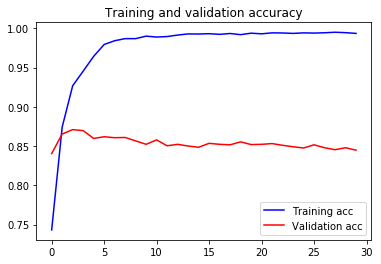

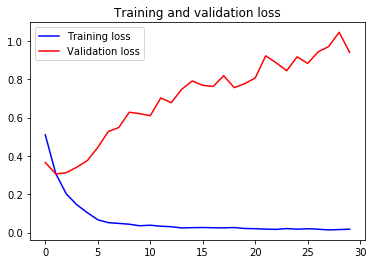

In [224]:
acc = training.history['acc']
val_acc = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Based on the model train on groundtruth labels, compare the results with Amazon tagged labels, see the difference.

In [226]:
pred=model.predict(X_test)
print(pred[0:5])
# evaluate the model
scores = model.evaluate(X_test, senti_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[[3.5762787e-07]
 [9.8335904e-01]
 [9.9999613e-01]
 [9.9987853e-01]
 [5.9007943e-01]]
acc: 69.34%
